In [3]:
#import required libraries
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt

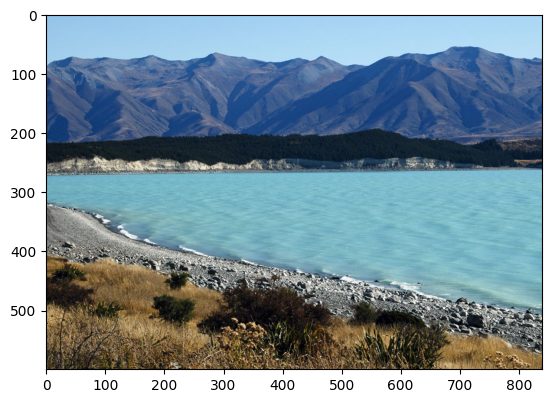

In [6]:
img = cv2.imread('images/New_Zealand_Lake.jpg',1)
img = img[:,:,::-1]
plt.imshow(img)


(600, 840, 3)


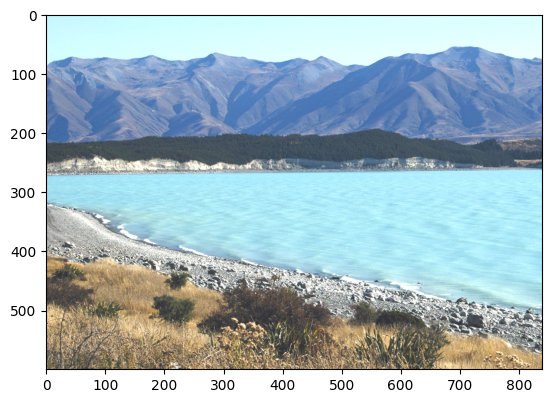

In [9]:
#Increasing Brightness - Lighter
matr = np.ones((img.shape), dtype = img.dtype)*50
print(matr.shape)
img_add = cv2.add(img , matr)
plt.imshow(img_add)

(600, 840, 3)


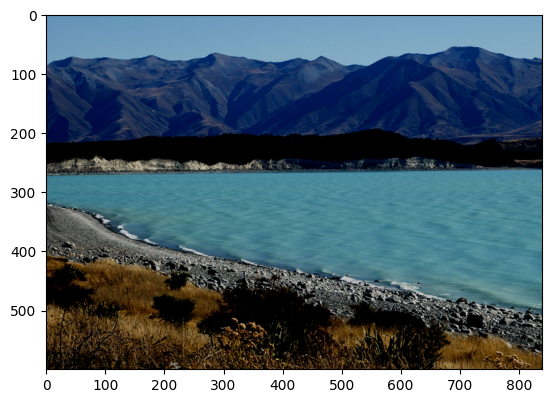

In [10]:
#Decreasing Brightness - Darker
matr = np.ones((img.shape), dtype = img.dtype)*50
img_add = cv2.subtract(img , matr)
plt.imshow(img_add)

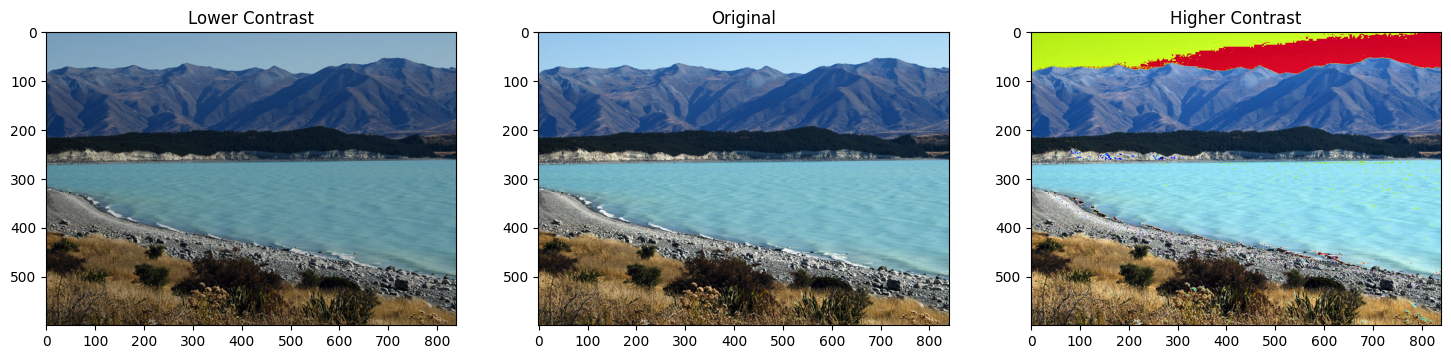

In [14]:
#Multiplication can be used to improve the contrast of the image.Contrast is the difference in the intensity values of the pixels of an image.
#Multiplying the intensity values with a constant can make the difference larger or smaller ( if multiplying factor is < 1 ).
matrix_low_contrast = np.ones(img.shape) * 0.8
matrix_high_contast = np.ones(img.shape) * 1.2

img_rgb_darker   = np.uint8(cv2.multiply(np.float64(img), matrix_low_contrast))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img), matrix_high_contast))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Higher Contrast");

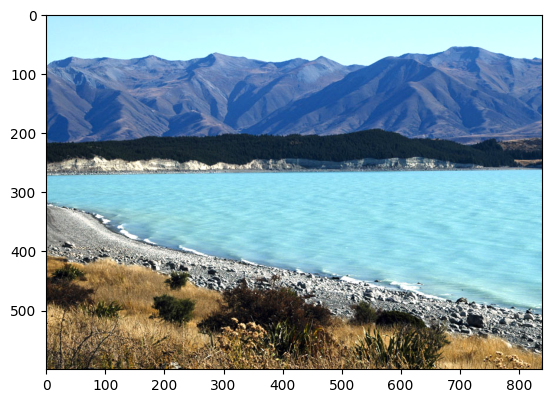

In [18]:
#Handling Overflow using np.clip
img_rgb_brighter = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix_high_contast),0,255))
plt.imshow(img_rgb_brighter)

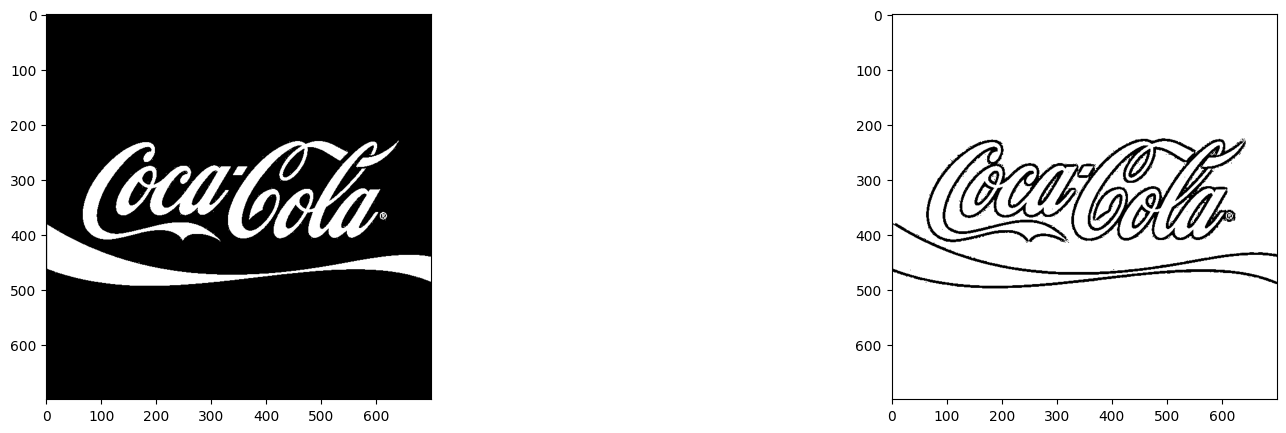

In [27]:
#Image Thresholding
#retval, dst = cv2.threshold( src, thresh, maxval, type[, dst] )
#dst = cv.adaptiveThreshold( src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst] )

img = cv2.imread('images/coca-cola-logo.png',0)
# Perform global thresholding
retval, img_thresh_gbl_2 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)

# Perform adaptive thresholding
img_thresh_adp = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

plt.figure(figsize=(20,5))
plt.subplot(121);plt.imshow(img_thresh_gbl_2,cmap='gray')
plt.subplot(122);plt.imshow(img_thresh_adp,cmap='gray')

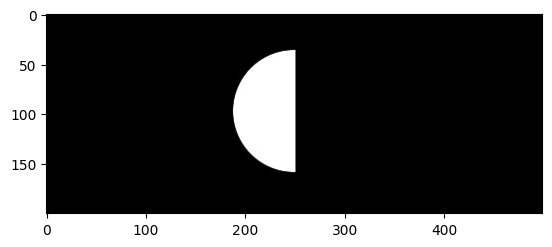

In [29]:
#bitwise and /or 
#dst = cv2.bitwise_and( src1, src2[, dst[, mask]] ) 
#mask: optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.
#bitwise__or/bitwise_xor
img = cv2.imread('images/circle.jpg',0)
img1 = cv2.imread('images/rectangle.jpg',0)
res = cv2.bitwise_and(img,img1)
plt.imshow(res,cmap='gray')
